In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
import pandas as pd

# 2. Load the dataset
df = pd.read_csv(r'/content/house_prices.csv')
display(df.head())

,GrLivArea,BedroomAbvGr,FullBath,TotalBsmtSF,GarageCars,YearBuilt,LotArea,OverallQual,SalePrice
0,1710,3,2,856,2,2003,8450,7,208500
1,1262,3,2,1262,2,1976,9600,6,181500
2,1786,3,2,920,2,2001,11250,7,223500
3,1717,3,1,756,3,1915,9550,7,140000
4,2198,4,2,1145,3,2000,14260,8,250000


In [5]:
# 3. Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   TotalBsmtSF   1460 non-null   int64
 4   GarageCars    1460 non-null   int64
 5   YearBuilt     1460 non-null   int64
 6   LotArea       1460 non-null   int64
 7   OverallQual   1460 non-null   int64
 8   SalePrice     1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB


In [10]:
df.isnull().sum()

,0
GrLivArea,0
BedroomAbvGr,0
FullBath,0
TotalBsmtSF,0
GarageCars,0
YearBuilt,0
LotArea,0
OverallQual,0
SalePrice,0


In [11]:
df.describe()

,GrLivArea,BedroomAbvGr,FullBath,TotalBsmtSF,GarageCars,YearBuilt,LotArea,OverallQual,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,1057.429452,1.767123,1971.267808,10516.828082,6.099315,180921.195890
std,525.480383,0.815778,0.550916,438.705324,0.747315,30.202904,9981.264932,1.382997,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,1300.000000,1.000000,34900.000000
25%,1129.500000,2.000000,1.000000,795.750000,1.000000,1954.000000,7553.500000,5.000000,129975.000000
50%,1464.000000,3.000000,2.000000,991.500000,2.000000,1973.000000,9478.500000,6.000000,163000.000000
75%,1776.750000,3.000000,2.000000,1298.250000,2.000000,2000.000000,11601.500000,7.000000,214000.000000
max,5642.000000,8.000000,3.000000,6110.000000,4.000000,2010.000000,215245.000000,10.000000,755000.000000


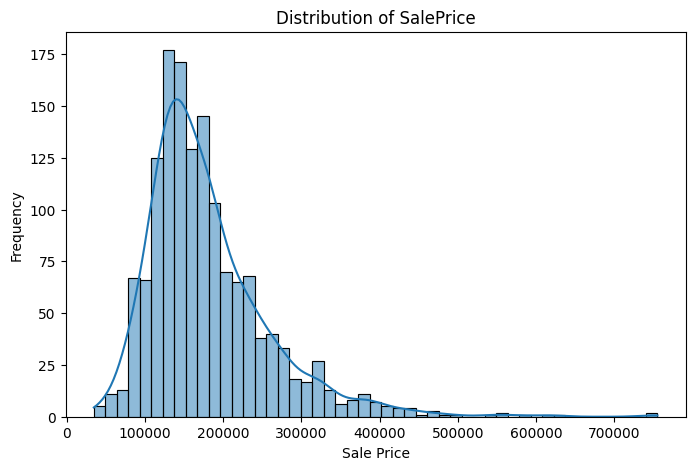

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

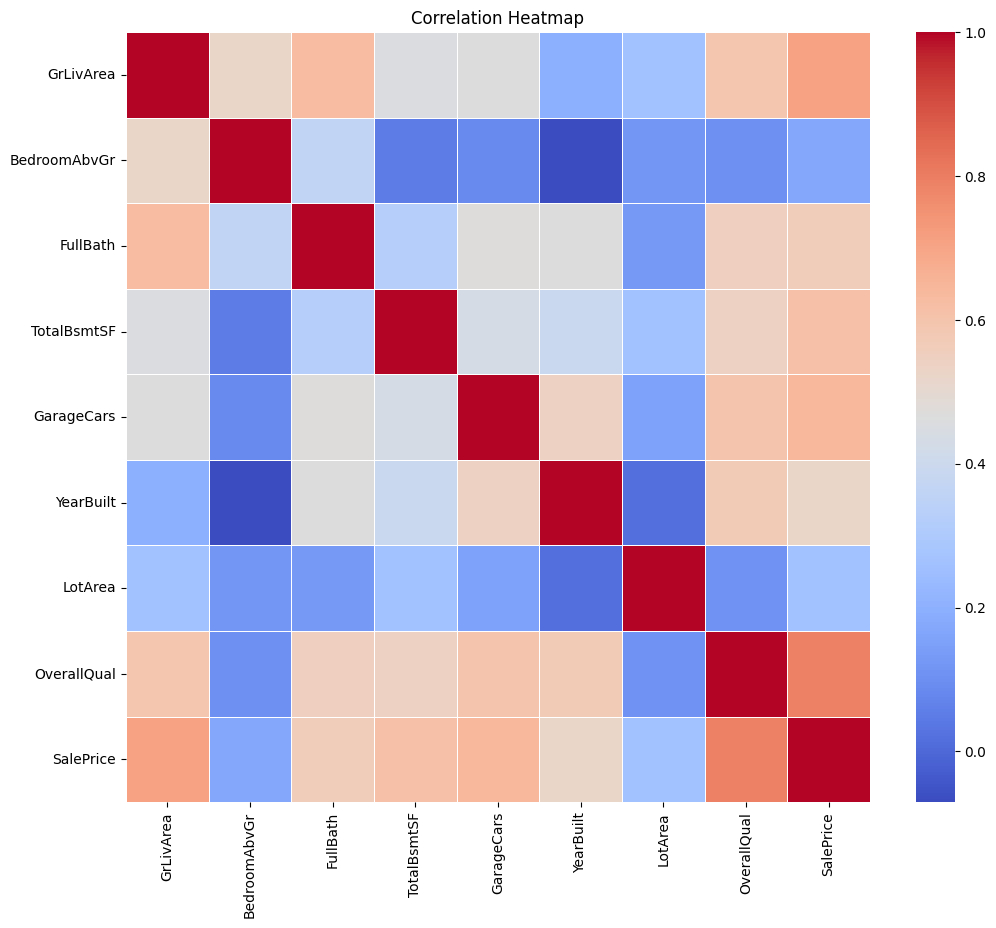

In [26]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [27]:
# Handle missing values
df = df.dropna()

# Features and target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Convert categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("R2 Score:", r2)
    print("MSE:", mse)
    print("MAE:", mae)


In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression Performance:")
evaluate_model(lr_model, X_test, y_test)


Linear Regression Performance:
R2 Score: 0.8029545541419006
MSE: 1511402847.3722513
MAE: 24533.442518257267


In [30]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

print("Decision Tree Regressor Performance:")
evaluate_model(dt_model, X_test, y_test)


Decision Tree Regressor Performance:
R2 Score: 0.8039474615528174
MSE: 1503786923.6369863
MAE: 25344.54109589041


In [31]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [32]:
print("XGBoost Regressor Performance:")
evaluate_model(xgb_model, X_test, y_test)

XGBoost Regressor Performance:
R2 Score: 0.8908768892288208
MSE: 837009920.0
MAE: 19131.677734375


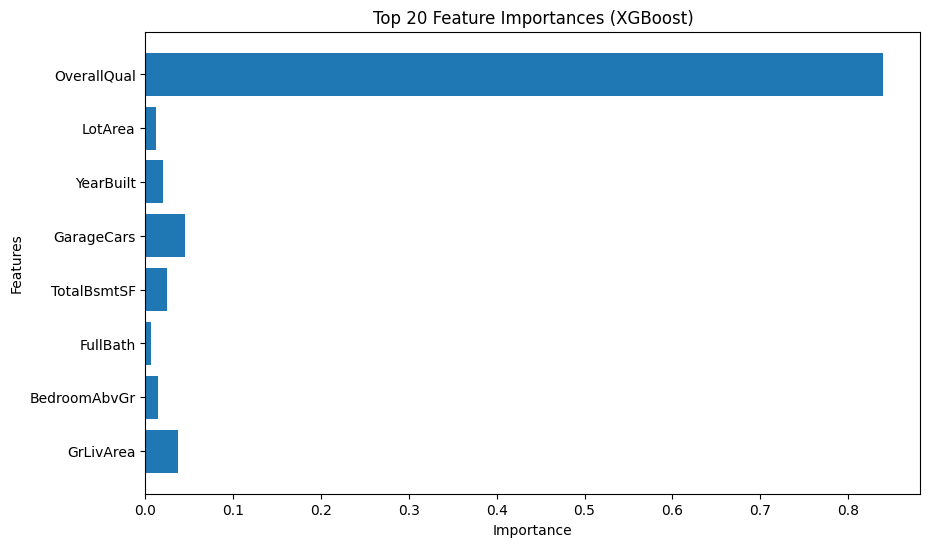

In [33]:
plt.figure(figsize=(10,6))
plt.barh(X.columns[:20], xgb_model.feature_importances_[:20])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()

In [34]:
xgb_tuned = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42
)

xgb_tuned.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
print("Tuned XGBoost Regressor Performance:")
evaluate_model(xgb_tuned, X_test, y_test)

Tuned XGBoost Regressor Performance:
R2 Score: 0.9061120748519897
MSE: 720150848.0
MAE: 17650.103515625


In [36]:
import pickle

# Save the trained model
with open("xgboost_house_price_model.pkl", "wb") as file:
    pickle.dump(xgb_tuned, file)

print("Model saved as xgboost_house_price_model.pkl")


Model saved as xgboost_house_price_model.pkl
